In [47]:
# By default, available from 8AM-7:20PM ET

# Unavailable time given the member
# Chairs 
# C1 The University of British Columbia M/W 10 to 12
# C2 University of Calgary T/Th 2 to 4
# C3 National Research Council Canada M/W 1 o 3
# C4 York University T/F 9 to 11
# C5 University of California – San Diego Th 8 to 12
# C6 Université de Sherbrooke W/F 10 to 12
# C7 University of Victoria T/Th 1 to 3
# C8 Université Laval Th 8 to 12
# C9 Hydro-Québec T/F 10 to 12
# C10 Canadian Food Inspection Agency M/F 11 to 2


# ChatGPT Prompt
#####
# 
# For each of these Universities, make a JSON file to encode the information, and the UTC timezone offset, with the keys C1, C2, etc.
# 
# For the unavailableTime, make it another object e.g. {
#   M: [10, 12],
#   W: [13, 16]
# }
# 
# ```
# # Chairs 
# # C1 The University of British Columbia M/W 10 to 12
# # C2 University of Calgary T/Th 2 to 4
# # C3 National Research Council Canada M/W 1 o 3
# # C4 York University T/F 9 to 11
# # C5 University of California – San Diego Th 8 to 12
# # C6 Université de Sherbrooke W/F 10 to 12
# # C7 University of Victoria T/Th 1 to 3
# # C8 Université Laval Th 8 to 12
# # C9 Hydro-Québec T/F 10 to 12
# # C10 Canadian Food Inspection Agency M/F 11 to 2
# ```
chairs = {
    "C1": {
        "university": "The University of British Columbia",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C2": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "T": [{"start": 14, "end": 16}],
            "Th": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -7
    },
    "C3": {
        "university": "National Research Council Canada",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "W": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "C4": {
        "university": "York University",
        "unavailableTimes": {
            "T": [{"start": 9, "end": 11}],
            "F": [{"start": 9, "end": 11}]
        },
        "timezone_offset": -5
    },
    "C5": {
        "university": "University of California – San Diego",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C6": {
        "university": "Université de Sherbrooke",
        "unavailableTimes": {
            "W": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C7": {
        "university": "University of Victoria",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -8
    },
    "C8": {
        "university": "Université Laval",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C9": {
        "university": "Hydro-Québec",
        "unavailableTimes": {
            "T": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C10": {
        "university": "Canadian Food Inspection Agency",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 14}],
            "F": [{"start": 11, "end": 14}]
        },
        "timezone_offset": -5
    }
}

In [48]:
# For each of the chairs, make the time offset relative to UTC-5
for chair in chairs:
    chairs[chair]["timezone_offset"] = chairs[chair]["timezone_offset"] + 5
    for day in chairs[chair]["unavailableTimes"]:
        for time in chairs[chair]["unavailableTimes"][day]:
            time["start"] = 3 * (time["start"] + chairs[chair]["timezone_offset"])
            # -1 because the end time is exclusive
            time["end"] = 3 * (time["end"] + chairs[chair]["timezone_offset"]) - 1
chairs


{'C1': {'university': 'The University of British Columbia',
  'unavailableTimes': {'M': [{'start': 21, 'end': 26}],
   'W': [{'start': 21, 'end': 26}]},
  'timezone_offset': -3},
 'C2': {'university': 'University of Calgary',
  'unavailableTimes': {'T': [{'start': 36, 'end': 41}],
   'Th': [{'start': 36, 'end': 41}]},
  'timezone_offset': -2},
 'C3': {'university': 'National Research Council Canada',
  'unavailableTimes': {'M': [{'start': 39, 'end': 44}],
   'W': [{'start': 39, 'end': 44}]},
  'timezone_offset': 0},
 'C4': {'university': 'York University',
  'unavailableTimes': {'T': [{'start': 27, 'end': 32}],
   'F': [{'start': 27, 'end': 32}]},
  'timezone_offset': 0},
 'C5': {'university': 'University of California – San Diego',
  'unavailableTimes': {'Th': [{'start': 15, 'end': 26}]},
  'timezone_offset': -3},
 'C6': {'university': 'Université de Sherbrooke',
  'unavailableTimes': {'W': [{'start': 30, 'end': 35}],
   'F': [{'start': 30, 'end': 35}]},
  'timezone_offset': 0},
 'C7'

In [49]:

# For each of the chairs, make it into distinct 20 minute time block arrays for each day of the week
# from 8am to 7:20pm

for chair in chairs:
    for day in ['M', 'T', 'W', 'Th', 'F']:
        if not chairs[chair].get('schedule'):
            chairs[chair]['schedule'] = {}
        # for time in range(8, 20):
        chairs[chair]['schedule'][day] = {
            # Meeting block that *starts at* the time is by default available
            time: False for time in range(8 * 3, 19 * 3)
        }


In [50]:
# For each of the chairs, make 9:20-9:40, 2:20-2:40, and 12:20 to 1:00 unavailable for each day of the week

for chair in chairs:
    tz_offset = chairs[chair]["timezone_offset"]
    for day in ['M', 'T', 'W', 'Th', 'F']:
        start_coffee_1 = (9 + tz_offset) * 3 + 1
        # Check if exists
        if start_coffee_1 in chairs[chair]['schedule'][day]:
            chairs[chair]['schedule'][day][start_coffee_1] = True

        start_coffee_2 = (14 + tz_offset) * 3 + 1
        # Check if exists
        if start_coffee_2 in chairs[chair]['schedule'][day]:
            chairs[chair]['schedule'][day][start_coffee_2] = True

        start_lunch = (12 + tz_offset) * 3 + 1
        for time in range(start_lunch, start_lunch + 2):
            # Check if exists
            if time in chairs[chair]['schedule'][day]:
                chairs[chair]['schedule'][day][time] = True

chairs

{'C1': {'university': 'The University of British Columbia',
  'unavailableTimes': {'M': [{'start': 21, 'end': 26}],
   'W': [{'start': 21, 'end': 26}]},
  'timezone_offset': -3,
  'schedule': {'M': {24: False,
    25: False,
    26: False,
    27: False,
    28: True,
    29: True,
    30: False,
    31: False,
    32: False,
    33: False,
    34: True,
    35: False,
    36: False,
    37: False,
    38: False,
    39: False,
    40: False,
    41: False,
    42: False,
    43: False,
    44: False,
    45: False,
    46: False,
    47: False,
    48: False,
    49: False,
    50: False,
    51: False,
    52: False,
    53: False,
    54: False,
    55: False,
    56: False},
   'T': {24: False,
    25: False,
    26: False,
    27: False,
    28: True,
    29: True,
    30: False,
    31: False,
    32: False,
    33: False,
    34: True,
    35: False,
    36: False,
    37: False,
    38: False,
    39: False,
    40: False,
    41: False,
    42: False,
    43: False,
    44: Fa

In [51]:
# For all of the unavailable times, make them unavailable in the schedule
for chair in chairs:
    for day in chairs[chair]["unavailableTimes"]:
        for time in chairs[chair]["unavailableTimes"][day]:
            for i in range(time["start"], time["end"]):
                # Check if exists
                if i in chairs[chair]["schedule"][day]:
                    chairs[chair]["schedule"][day][i] = True
chairs

{'C1': {'university': 'The University of British Columbia',
  'unavailableTimes': {'M': [{'start': 21, 'end': 26}],
   'W': [{'start': 21, 'end': 26}]},
  'timezone_offset': -3,
  'schedule': {'M': {24: True,
    25: True,
    26: False,
    27: False,
    28: True,
    29: True,
    30: False,
    31: False,
    32: False,
    33: False,
    34: True,
    35: False,
    36: False,
    37: False,
    38: False,
    39: False,
    40: False,
    41: False,
    42: False,
    43: False,
    44: False,
    45: False,
    46: False,
    47: False,
    48: False,
    49: False,
    50: False,
    51: False,
    52: False,
    53: False,
    54: False,
    55: False,
    56: False},
   'T': {24: False,
    25: False,
    26: False,
    27: False,
    28: True,
    29: True,
    30: False,
    31: False,
    32: False,
    33: False,
    34: True,
    35: False,
    36: False,
    37: False,
    38: False,
    39: False,
    40: False,
    41: False,
    42: False,
    43: False,
    44: Fals

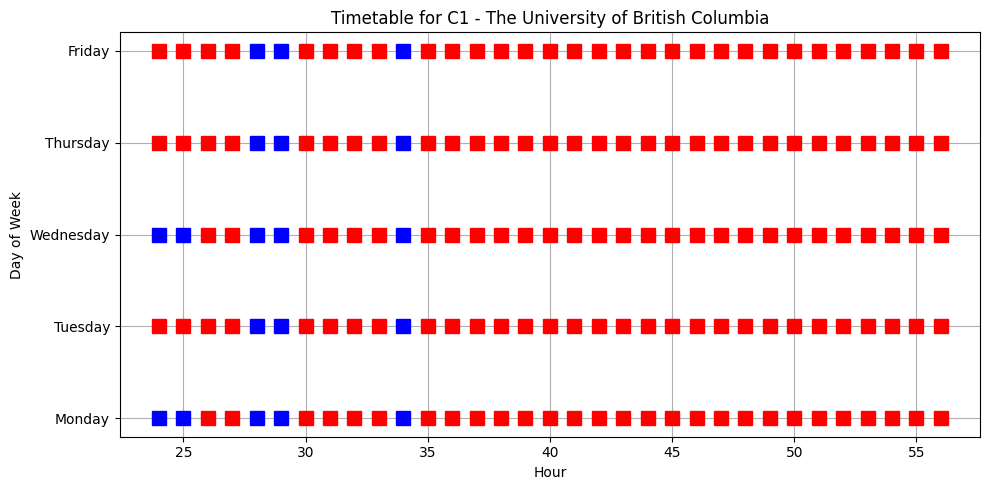

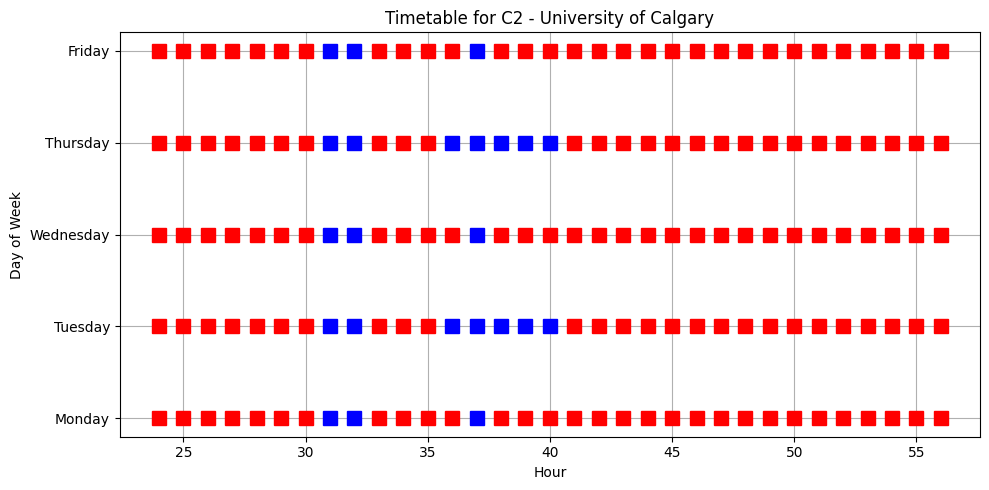

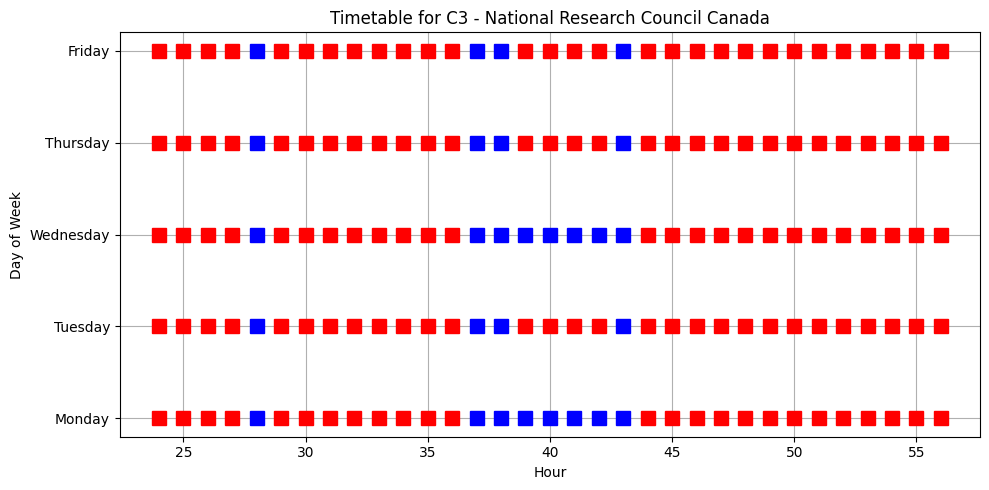

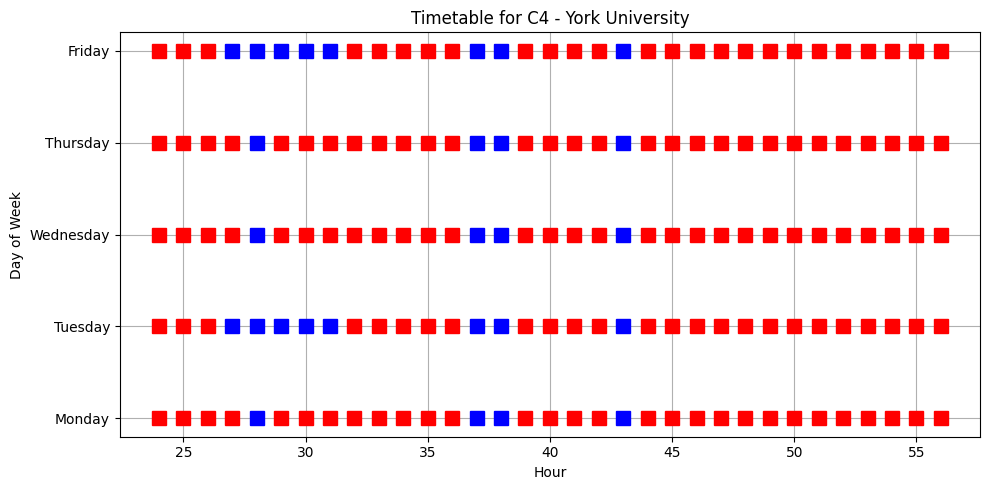

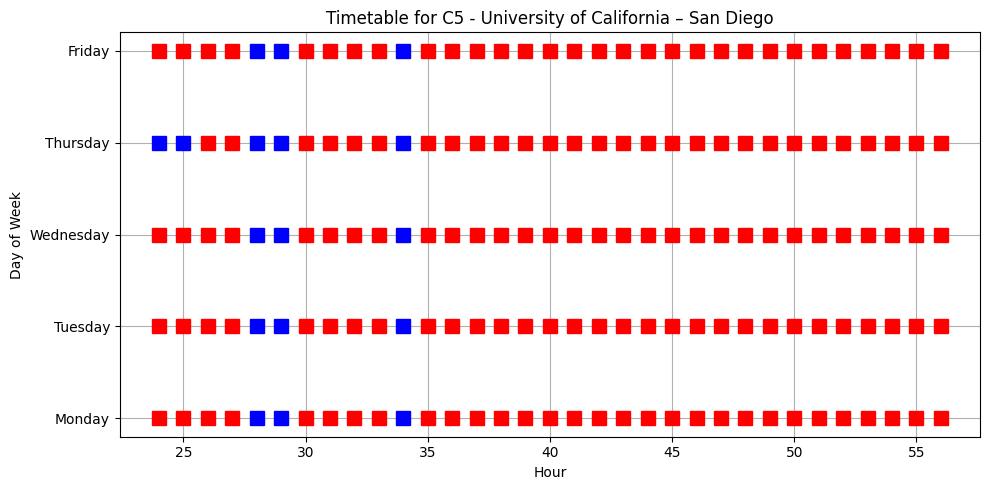

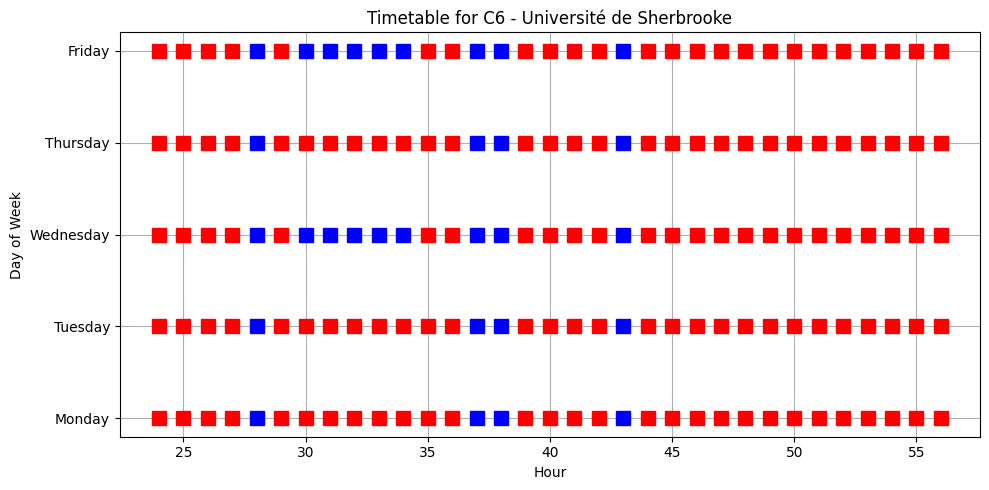

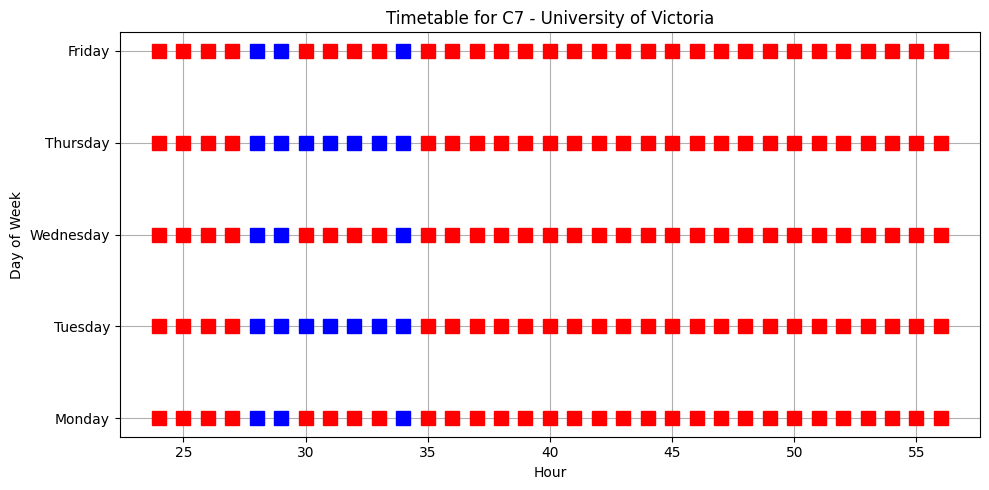

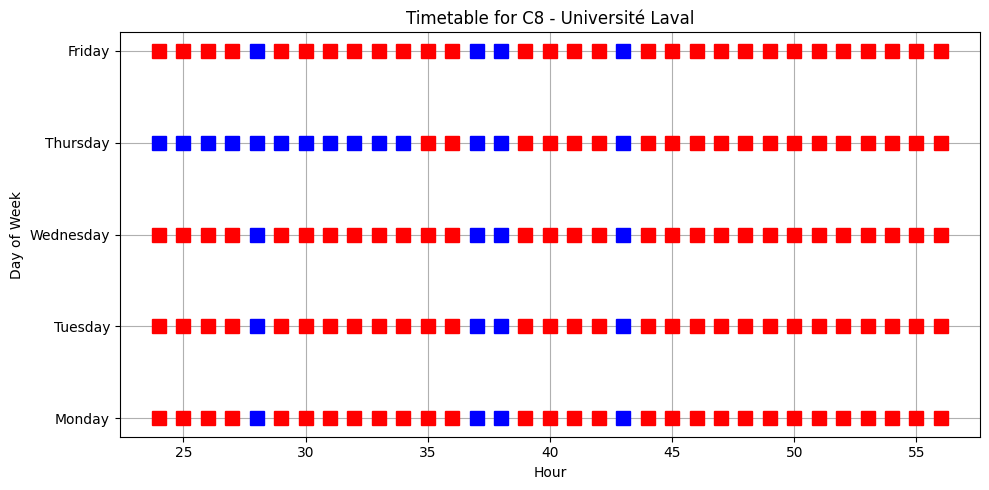

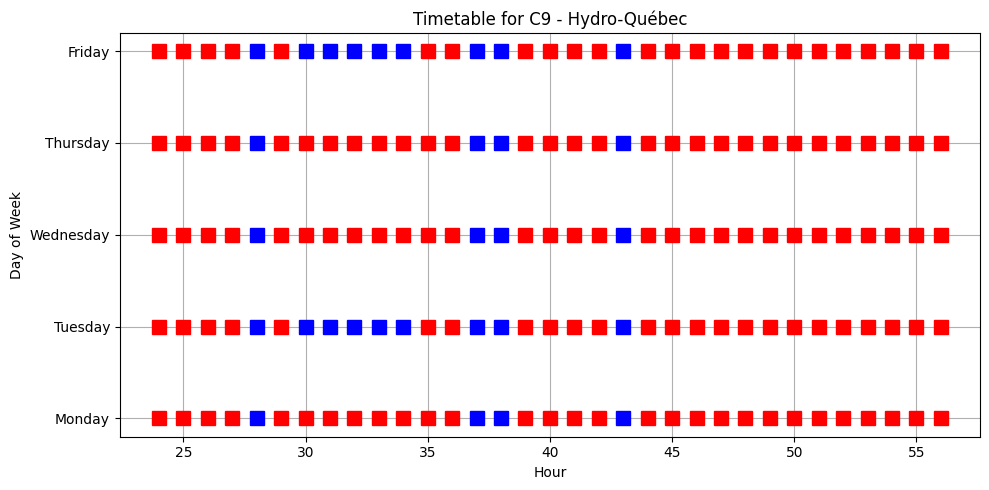

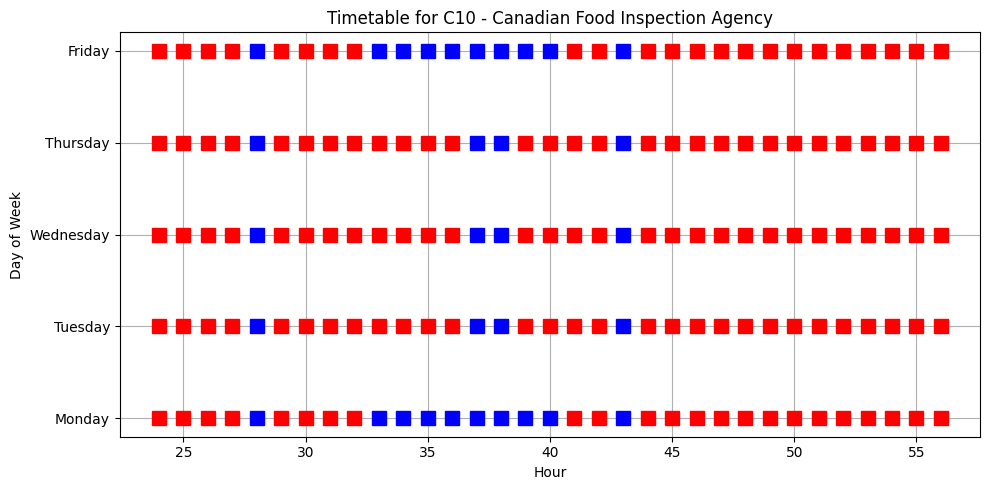

In [53]:
# Plot the schedule for each chair
import matplotlib.pyplot as plt
import numpy as np

# Create a plot for each course
for chair_id, data in chairs.items():
    plt.figure(figsize=(10, 5))
    plt.title(f"Timetable for {chair_id} - {data['university']}")
    for day, schedule in data['schedule'].items():
        for hour, occupied in schedule.items():
            if occupied:
                plt.plot(hour, day, 'bs', markersize=10)  # Blue square for occupied hours
            else:
                plt.plot(hour, day, 'rs',
                         markersize=10)  # Red square for available hours
    plt.yticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.xlabel('Hour')
    plt.ylabel('Day of Week')
    plt.grid(True)
    plt.tight_layout()

plt.show()

In [ ]:



# Members 
# M1 University of Toronto T/Th 2 to 4
# M2 Toronto Metropolitan University M/W 1 o 3
# M3 University of Michigan T/F 9 to 11
# M4 École Polytechnique de Montréal M/Th 11 to 1
# M5 University of Guelph M/F 2 to 4
# M6 University of Calgary M/F 3 to 5
# M7 University of Prince Edward Island M 1 to 3
# M8 University of Manitoba M/W 10 to 12
# M9 National Research Council Th 8 to 12
# M10 Royal Military College of Canada F 11 to 1
# M11 Dalhousie University M/Th 11 to 1
# M12 University of Windsor M/F 2 to 4
# M13 Queen’s University M/F 3 to 5
# M14 The University of Western Ontario W 12 to 5
# M15 École Polytechnique de Montréal W/F 10 to 12
# M16 Université du Québec en Abitibi-Témiscamingue T/Th 1 to 3
# M17 Université du Québec à Trois Rivieres M/W 10 to 12
# M18 FPrimeC Solutions Inc. T/F 10 to 12
# M19 Institut national de la recherche scientifique Thu 10 to 3
# M20 Université du Québec à Chicoutimi T/Th 3 to 5
# M21 Université Catholique de Louvain M/T 1 to 3
# M22 University of Northern British Columbia Th 8 to 12
# M23 University of Saskatchewan M/T 10 to 12
# M24 University of Alberta T/W 3 to 5
# M25 University of Waterloo T/W 3 to 5
# M26 University of Alberta M/W 10 to 12
# M27 Brock University M/F 11 to 2
# M28 University of Cyprus T/Th 1 to 3
# M29 University of Manitoba F 12 to 4
# M30 McMaster University T/Th 8 to 10

members = {
    "M1": {
        "university": "University of Toronto",
        "unavailableTimes": {
            "T": [14, 16],
            "Th": [14, 16]
        },
        "timezone_offset": -5
    },
    "M2": {
        "university": "Toronto Metropolitan University",
        "unavailableTimes": {
            "M": [13, 15],
            "W": [13, 15]
        },
        "timezone_offset": -5
    },
    "M3": {
        "university": "University of Michigan",
        "unavailableTimes": {
            "T": [9, 11],
            "F": [9, 11]
        },
        "timezone_offset": -5
    },
    "M4": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "M": [11, 13],
            "Th": [11, 13]
        },
        "timezone_offset": -5
    },
    "M5": {
        "university": "University of Guelph",
        "unavailableTimes": {
            "M": [14, 16],
            "F": [14, 16]
        },
        "timezone_offset": -5
    },
    "M6": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "M": [15, 17],
            "F": [15, 17]
        },
        "timezone_offset": -7
    },
    "M7": {
        "university": "University of Prince Edward Island",
        "unavailableTimes": {
            "M": [13, 15]
        },
        "timezone_offset": -4
    },
    "M8": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "M": [10, 12],
            "W": [10, 12]
        },
        "timezone_offset": -6
    },
    "M9": {
        "university": "National Research Council",
        "unavailableTimes": {
            "Th": [8, 12]
        },
        "timezone_offset": -5
    },
    "M10": {
        "university": "Royal Military College of Canada",
        "unavailableTimes": {
            "F": [11, 13]
        },
        "timezone_offset": -5
    },
    "M11": {
        "university": "Dalhousie University",
        "unavailableTimes": {
            "M": [11, 13],
            "Th": [11, 13]
        },
        "timezone_offset": -4
    },
    "M12": {
        "university": "University of Windsor",
        "unavailableTimes": {
            "M": [14, 16],
            "F": [14, 16]
        },
        "timezone_offset": -5
    },
    "M13": {
        "university": "Queen’s University",
        "unavailableTimes": {
            "M": [15, 17],
            "F": [15, 17]
        },
        "timezone_offset": -5
    },
    "M14": {
        "university": "The University of Western Ontario",
        "unavailableTimes": {
            "W": [12, 17]
        },
        "timezone_offset": -5
    },
    "M15": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "W": [10, 12],
            "F": [10, 12]
        },
        "timezone_offset": -5
    },
    "M16": {
        "university": "Université du Québec en Abitibi-Témiscamingue",
        "unavailableTimes": {
            "T": [13, 15],
            "Th": [13, 15]
        },
        "timezone_offset": -5
    },
    "M17": {
        "university": "Université du Québec à Trois Rivieres",
        "unavailableTimes": {
            "M": [10, 12],
            "W": [10, 12]
        },
        "timezone_offset": -5
    },
    "M18": {
        "university": "FPrimeC Solutions Inc.",
        "unavailableTimes": {
            "T": [10, 12],
            "F": [10, 12]
        },
        "timezone_offset": -5
    },
    "M19": {
        "university": "Institut national de la recherche scientifique",
        "unavailableTimes": {
            "Thu": [10, 15]
        },
        "timezone_offset": -5
    },
    "M20": {
        "university": "Université du Québec à Chicoutimi",
        "unavailableTimes": {
            "T": [15, 17],
            "Th": [15, 17]
        },
        "timezone_offset": -5
    },
    "M21": {
        "university": "Université Catholique de Louvain",
        "unavailableTimes": {
            "M": [13, 15],
            "T": [13, 15]
        },
        "timezone_offset": 1
    },
    "M22": {
        "university": "University of Northern British Columbia",
        "unavailableTimes": {
            "Th": [8, 12]
        },
        "timezone_offset": -8
    },
    "M23": {
        "university": "University of Saskatchewan",
        "unavailableTimes": {
            "M": [10, 12],
            "T": [10, 12]
        },
        "timezone_offset": -6
    },
    "M24": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "T": [15, 17],
            "W": [15, 17]
        },
        "timezone_offset": -7
    },
    "M25": {
        "university": "University of Waterloo",
        "unavailableTimes": {
            "T": [15, 17],
            "W": [15, 17]
        },
        "timezone_offset": -5
    },
    "M26": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "M": [10, 12],
            "W": [10, 12]
        },
        "timezone_offset": -7
    },
    "M27": {
        "university": "Brock University",
        "unavailableTimes": {
            "M": [11, 14],
            "F": [11, 14]
        },
        "timezone_offset": -5
    },
    "M28": {
        "university": "University of Cyprus",
        "unavailableTimes": {
            "T": [13, 15],
            "Th": [13, 15]
        },
        "timezone_offset": 2
    },
    "M29": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "F": [12, 16],
            "timezone_offset": -6
        },
    },
    "M30": {
        "university": "McMaster University",
        "unavailableTimes": {
            "T": [8, 10],
            "Th": [8, 10]
        },
        "timezone_offset": -5
    }
}
